In [1]:
import praw

# reddit = praw.Reddit("bot1", user_agent="bot1 user agent")

reddit = praw.Reddit(
    client_id="K_0NkCXl7JaNpTjvG_KUcA",
    client_secret="BNwMAlZmWETacpRCxm1Raj_dphVDTA",
    user_agent="my agent",
    username="andyaaabbb",
    password="iFw@N&<&5GKfnH7",
)

reddit.read_only = True

In [3]:
# example from Reddit API - praw
for submission in reddit.subreddit("cancer").stream.submissions():
    print(submission.title)

The last holidays. Just posting this because I need to let it out.
I think I am screwed
Anyone have experience with Y90?
It's Christmas, and I've never felt less jolly about it in my life.
first round of opdivo and yervoy and my nurse didn’t clamp it and i think maybe a quarter of the medicine dripped on the floor?
Merry Christmas everyone
Radioactive iodine
Nutrition and chemo
Neuropathy
Time for hospice for grandma-any suggestions would be appreciated
How are you doing?
quality of life
My brother is still struggling with residual tumors after chemo. Any advice?
I’m 28years old,2x PTCL NHL survivor who’s gone through an Auto and and Allo transplant, they think my cancer is back 6 months post allo… AMA
What was the one food you enjoyed eating while on radiotherapy?
How to deal with the waiting for the confirmation of a potencial cancer?
Advice for Stage IV Neuroendocrine Carcinoma
A Patient Patient
11 days post open liver resection for HCC - AMA
Pancreatic cancer/what to do before chem

KeyboardInterrupt: 

In [ ]:
## Original code using pmaw

In [57]:
import pandas as pd
from pmaw import PushshiftAPI
import requests
import json
import csv
import time
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [70]:
# get keywords for each Health Category and Symptom from Appendix
keywords = pd.read_csv('keywords.csv',encoding = "ISO-8859-1")
keywords.head()
# convert keywords to dict
keywords_dict = keywords.set_index('Health Category')['Keywords'].to_dict()

In [71]:
keywords_dict

{'Cardiovascular': 'heart, cholesterol, CHF, stroke, angina, chest pain, chest tightness, high blood pressure, low blood pressure, congestive heart failure, heart attack, myocardial infraction, coronary heart disease, cardiovascular disease, blood clots, heart rate',
 'Respiratory': 'wheezing, cough, coughing, coughed, coughs, COPD, emphysema, asthma, asthmatic, respiratory, lung, lungs, shortness of breath, dry cough, chronic bronchitis, wet lung, popcorn lung, acute bronchitis, pneumonia, cystic fibrosis, interstitial lung disease, mesothelioma, sleep apnea',
 'Neurological': 'seizure, seizures, headache, dizzy, dizziness, fatigue, fatigued, numb, numbness, tingle, tingling, tingles, sensitive, sensitivity, sleeping disorder',
 'Cancer': 'lung cancer, mouth cancer, liver cancer, colon cancer, rectum cancer, throat cancer, larynx cancer, stomach cancer, pancreatic cancer, bladder cancer, kidney cancer, cervix cancer, leukemia',
 'Psychological': 'depression, depressed, unrested, irrit

In [36]:
# query from Reddit
api = PushshiftAPI()

before = int(datetime(2021,12,31,0,0).timestamp())
after = int(datetime(2013,1,1,0,0).timestamp())

subreddit = 'marijuana'
q_list = ['respiratory','cardiovascular','neurological','psychological','digestive','mouth','throat','cancer']
q = 'cancer' # q = '*' for everything
for item in keywords_dict:
    sub_words = keywords_dict[item].split(', ')
    posts_sum = pd.DataFrame()
    comments_sum = pd.DataFrame()
    # start reddit query
    for q in sub_words:
        try:
            limit=100000
            posts = api.search_submissions(subreddit=subreddit, q=q, limit=limit, before=before, after=after)
            comments = api.search_comments(subreddit=subreddit, q=q, limit=limit, before=before, after=after)
            print(f'Retrieved {len(posts)} posts from Pushshift')
            print(f'Retrieved {len(comments)} comments from Pushshift')

            posts_df = pd.DataFrame(posts)
            comments_df = pd.DataFrame(comments)

            # print(posts_df.head())
            # remove null created_utc rows
            posts_df = posts_df.loc[posts_df.created_utc.notnull()]
            comments_df = comments_df.loc[comments_df.created_utc.notnull()]
            # create datetime
            posts_df['created_datetime'] = [datetime.fromtimestamp(x) for x in posts_df.created_utc]
            comments_df['created_datetime'] = [datetime.fromtimestamp(x) for x in comments_df.created_utc]

            # add Health Category and Symptom into dataframe
            posts_df['Health Category'] = item
            posts_df['Health Symptom'] = q
            comments_df['Health Category'] = item
            comments_df['Health Symptom'] = q

            # merge dataframe
            posts_sum = posts_sum.append(posts_df, sort=False)
            comments_sum = comments_sum.append(comments_df, sort=False)
        except:
            print('No Posts about {} in {}'.format(q, item))

    # save to csv
    posts_sum.to_csv('data/mari_posts_{}.csv'.format(item), header=True, index=False, columns=list(posts_df.axes[1]))
    comments_sum.to_csv('data/mari_comments_{}.csv'.format(item), header=True, index=False, columns=list(comments_df.axes[1]))

    print('Download {} related posts and comments'.format(item))

INFO:pmaw.PushshiftAPIBase:99472 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 12 - Batches: 2 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:98408 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 20 - Batches: 4 - Items Remaining: 1
INFO:pmaw.PushshiftAPIBase:1 result(s) not found in Pushshift
Retrieved 528 posts from Pushshift
Retrieved 1591 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99994 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99967 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 6 posts from Pushshift
Retrieved 33 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:100000 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:99998 result

Retrieved 146 posts from Pushshift
Retrieved 278 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:100000 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:100000 result(s) not found in Pushshift
Retrieved 0 posts from Pushshift
Retrieved 0 comments from Pushshift
No Posts about myocardial infraction in Cardiovascular
INFO:pmaw.PushshiftAPIBase:99999 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 9 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99995 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 9 - Batches: 1 - Items Remaining: 0
Retrieved 1 posts from Pushshift
Retrieved 5 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99995 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99982 result(s) not found in Pushshift
INFO:pmaw.PushshiftA

INFO:pmaw.PushshiftAPIBase:99960 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 3 posts from Pushshift
Retrieved 40 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99929 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99788 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 71 posts from Pushshift
Retrieved 212 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99994 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99982 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 

INFO:pmaw.PushshiftAPIBase:99934 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 14 posts from Pushshift
Retrieved 66 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99997 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 5 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:100000 result(s) not found in Pushshift
Retrieved 3 posts from Pushshift
Retrieved 0 comments from Pushshift
No Posts about cystic fibrosis in Respiratory 
INFO:pmaw.PushshiftAPIBase:100000 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:99999 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 8 - Batches: 1 - Items Remaining: 0
Retrieved 0 posts from Pushshift
Retrieved 1 comments from Pushshift
No Posts about interstitial lung disease in Respiratory 
INFO:pmaw.PushshiftAPIBase:99995 result

Retrieved 93 posts from Pushshift
Retrieved 152 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99971 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 90.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99978 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 29 posts from Pushshift
Retrieved 22 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99991 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99987 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 9 - Batches: 1 - Items Remaining: 0
Retrieved 9 posts from Pushshift
Retrieved 13 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99966 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: 

INFO:pmaw.PushshiftAPIBase:99968 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 5 posts from Pushshift
Retrieved 32 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:100000 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:100000 result(s) not found in Pushshift
Retrieved 0 posts from Pushshift
Retrieved 0 comments from Pushshift
No Posts about larynx cancer in Cancer 
INFO:pmaw.PushshiftAPIBase:99997 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 85.71% - Requests: 7 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99979 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 3 posts from Pushshift
Retrieved 21 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99990 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Su

INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 0 posts from Pushshift
Retrieved 2 comments from Pushshift
No Posts about unrested in Psychological
INFO:pmaw.PushshiftAPIBase:99965 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 83.33% - Requests: 12 - Batches: 2 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99887 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 35 posts from Pushshift
Retrieved 113 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99727 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 55.56% - Requests: 18 - Batches: 6 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:98801 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 17 - Batches: 3 - Items Remaining: 0
Retrieved 273 posts from P

INFO:pmaw.PushshiftAPIBase:99999 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 9 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99996 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 9 - Batches: 1 - Items Remaining: 0
Retrieved 1 posts from Pushshift
Retrieved 4 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99977 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99957 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 76.92% - Requests: 13 - Batches: 2 - Items Remaining: 0
Retrieved 23 posts from Pushshift
Retrieved 43 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:100000 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:100000 result(s) not found in Pushshift
Retrieved 0 posts from Pushshift
Retrieve

INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99893 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 25 posts from Pushshift
Retrieved 107 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99975 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99847 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 25 posts from Pushshift
Retrieved 153 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99996 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99956 result(s) not found in Pushsh

Retrieved 1 posts from Pushshift
Retrieved 3 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99991 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99970 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 9 posts from Pushshift
Retrieved 30 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99982 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 62.50% - Requests: 16 - Batches: 3 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99970 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 18 posts from Pushshift
Retrieved 30 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99956 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Su

INFO:pmaw.PushshiftAPIBase:99906 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 66.67% - Requests: 15 - Batches: 2 - Items Remaining: 0
Retrieved 18 posts from Pushshift
Retrieved 94 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99990 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99921 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 10 posts from Pushshift
Retrieved 79 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99982 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99939 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0

INFO:pmaw.PushshiftAPIBase:99999 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99990 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 1 posts from Pushshift
Retrieved 10 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99980 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99883 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 20 posts from Pushshift
Retrieved 117 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99987 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 

INFO:pmaw.PushshiftAPIBase:99988 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 5 posts from Pushshift
Retrieved 12 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:99997 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 9 - Batches: 1 - Items Remaining: 0
INFO:pmaw.PushshiftAPIBase:99988 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 90.91% - Requests: 11 - Batches: 2 - Items Remaining: 0
Retrieved 3 posts from Pushshift
Retrieved 12 comments from Pushshift
INFO:pmaw.PushshiftAPIBase:100000 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:99999 result(s) not found in Pushshift
INFO:pmaw.PushshiftAPIBase:Total:: Success Rate: 100.00% - Requests: 9 - Batches: 1 - Items Remaining: 0
Retrieved 0 posts from Pushshift
Retrieved 1 comments from Pushshift
No Posts about macular degeneration in 

In [35]:
posts_sum.to_csv('data/mari_posts_{}.csv'.format(item), header=True, index=False, columns=list(posts_df.axes[1]))
comments_sum.to_csv('data/mari_comments_{}.csv'.format(item), header=True, index=False, columns=list(comments_df.axes[1]))


## 1.0 Temporal Analysis 

In [65]:
df = pd.DataFrame()
for item in keywords_dict:
    try:
        df_post = pd.read_csv('data/mari_posts_{}.csv'.format(item))
        df_post['created_datetime'] = pd.to_datetime(df_post['created_datetime'])
        df_post['month'] = [x.strftime('%Y-%m') for x in df_post.created_datetime]
        df = df.append(df_post, sort=False)
    except:
        print('No Posts about {}'.format(item))

No Posts about Mouth


In [66]:
df.head()

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,created_utc,domain,full_link,gilded,id,...,month,thumbnail_height,thumbnail_width,author_id,url_overridden_by_dest,author_cakeday,removed_by_category,media,secure_media,view_count
0,EricStrat,1.420984e+09,NaN,NaN,t2_knc0s,1441521544,self.Marijuana,https://www.reddit.com/r/Marijuana/comments/3j...,0.0,3jtzpn,...,2015-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tihkalittletrip,1.436445e+09,NaN,NaN,t2_onc67,1439129050,self.Marijuana,https://www.reddit.com/r/Marijuana/comments/3g...,0.0,3gcm30,...,2015-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nonamemyname,1.437191e+09,NaN,NaN,t2_ovog1,1437191477,self.Marijuana,https://www.reddit.com/r/Marijuana/comments/3d...,0.0,3dpbru,...,2015-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,steveacronin,1.404925e+09,NaN,NaN,t2_hbrdh,1434735581,self.Marijuana,https://www.reddit.com/r/Marijuana/comments/3a...,0.0,3afas5,...,2015-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Heezyg,1.422019e+09,NaN,NaN,t2_kwc3f,1434686627,self.Marijuana,https://www.reddit.com/r/Marijuana/comments/3a...,0.0,3ad81c,...,2015-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# group the count of each health category
test = df.groupby(['month','Health Category'])['domain'].count()
test = test.reset_index()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


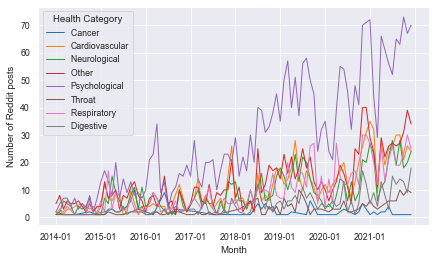

In [68]:
# figure 1
sns.set_style('darkgrid')
sns.set_context("paper", rc={"lines.linewidth":1})

fig, (ax1) = plt.subplots(1,1, figsize=(7, 4), facecolor='w', edgecolor='k', sharey=True, sharex=False)
fig.subplots_adjust(hspace = .2, wspace=.2)
sns.lineplot(data=test, x="month", y="domain", hue="Health Category",ax=ax1)
# ax1.axhline(0, color="k", clip_on=False)
loc = ticker.MultipleLocator(base=12) # this locator puts ticks at regular intervals
ax1.xaxis.set_major_locator(loc)
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Reddit posts")

fig.savefig('fig/monthly-health-related-posts.png', dpi=300, bbox_inches='tight')


In [76]:
# comments 
df2 = pd.DataFrame()
for item in keywords_dict:
    try:
        df_comment = pd.read_csv('data/mari_comments_{}.csv'.format(item))
        df_comment = df_comment.loc[df_comment.created_utc.notnull()]
        # create datetime
        df_comment['created_datetime'] = [datetime.fromtimestamp(x) for x in df_comment.created_utc]
        df_comment['created_datetime'] = pd.to_datetime(df_comment['created_datetime'])
        df_comment['month'] = [x.strftime('%Y-%m') for x in df_comment.created_datetime]
        df2 = df2.append(df_comment, sort=False)
    except:
        print('No Comments about {}'.format(item))

In [80]:
df2.head()

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,body,controversiality,created_utc,distinguished,gilded,...,body_sha1,collapsed_reason_code,retrieved_utc,unrepliable_reason,author_cakeday,created_datetime,Health Category,Health Symptom,month,rte_mode
0,ARKing005,1.372650e+09,NaN,NaN,t2_c7z4p,Do you truly believe in your heart that God wo...,0.0,1.383844e+09,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,2013-11-07 09:07:54,Cardiovascular,heart,2013-11,NaN
1,hepcat1of1,1.318783e+09,NaN,NaN,t2_61y27,There very well could be a risk of heart disea...,0.0,1.382994e+09,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,2013-10-28 14:07:34,Cardiovascular,heart,2013-10,NaN
2,TroubleInMyMind,1.338301e+09,NaN,NaN,t2_7u7zy,I thought the risk of heart disease came from ...,0.0,1.382992e+09,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,2013-10-28 13:19:47,Cardiovascular,heart,2013-10,NaN
3,hepcat1of1,1.318783e+09,NaN,NaN,t2_61y27,Increased respiratory issues is accurate but m...,0.0,1.382992e+09,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,2013-10-28 13:18:35,Cardiovascular,heart,2013-10,NaN
4,TroubleInMyMind,1.338301e+09,NaN,NaN,t2_7u7zy,The answer is seemingly no from the current ev...,0.0,1.382984e+09,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,2013-10-28 11:13:40,Cardiovascular,heart,2013-10,NaN


In [81]:
# group the comments count of each health category
test2 = df2.groupby(['month','Health Category'])['created_utc'].count()
test2 = test2.reset_index()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


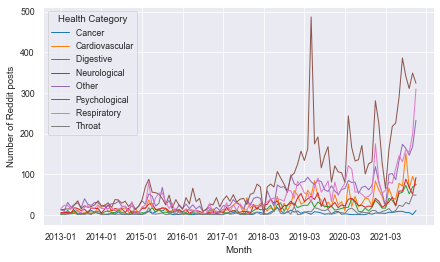

In [84]:
# figure 1
sns.set_style('darkgrid')
sns.set_context("paper", rc={"lines.linewidth":1})

fig, (ax1) = plt.subplots(1,1, figsize=(7, 4), facecolor='w', edgecolor='k', sharey=True, sharex=False)
fig.subplots_adjust(hspace = .2, wspace=.2)
sns.lineplot(data=test2, x="month", y="created_utc", hue="Health Category",ax=ax1)
# ax1.axhline(0, color="k", clip_on=False)
loc = ticker.MultipleLocator(base=12) # this locator puts ticks at regular intervals
ax1.xaxis.set_major_locator(loc)
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Reddit posts")

fig.savefig('fig/monthly-health-related-comments.png', dpi=300, bbox_inches='tight')
